<a href="https://colab.research.google.com/github/DariiaKhoroshchuk/deep_learning_labs/blob/master/Lab1_Dariia_Khoroshchuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Example:

## Regression

In [ ]:
import pandas as pd
#read in data using pandas
data_df = pd.read_csv('/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab1/hourly_wages_data.csv')

#check data has been read in properly
data_df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_df, test_size=0.1)

In [ ]:
train_X = train_df.drop(columns=['wage_per_hour'])
test_X = test_df.drop(columns=['wage_per_hour'])

train_X.head()

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
513,1,12,39,57,0,1,0,0,0
510,0,17,14,37,1,1,0,0,0
280,0,12,8,26,0,1,1,0,0
166,0,16,8,30,0,0,0,0,0
363,0,16,20,42,1,0,0,0,0


In [ ]:
train_y = train_df['wage_per_hour']
test_y = test_df['wage_per_hour']

train_y.head()

513    15.00
510     9.50
280     4.00
166    13.45
363     4.00
Name: wage_per_hour, dtype: float64

In [ ]:
# # create a dataframe with all training data except the target column
# train_X = train_df.drop(columns=['wage_per_hour'])

# #check that the target variable has been removed
# train_X.head()

In [ ]:
# # create a dataframe with target column
# train_Y = train_df['wage_per_hour']

# #check that the target variable has been removed
# train_Y.head()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [ ]:
#compile model using mse as a measure of model performance

model.compile(optimizer='adam',
loss='mean_squared_error')

In [ ]:
from keras.callbacks import EarlyStopping

#set early stopping monitor so the model stops training when 
# it won't improve anymore

early_stopping_monitor = EarlyStopping(patience=3)

#train model
model.fit(train_X, train_y, validation_split=0.2,
epochs=30, callbacks=[early_stopping_monitor])

Epoch 1/30
12/12 [==============================] - 1s 18ms/step - loss: 215.8195 - val_loss: 180.2429
Epoch 2/30
12/12 [==============================] - 0s 5ms/step - loss: 159.4170 - val_loss: 131.1542
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 117.6094 - val_loss: 94.5229
Epoch 4/30
12/12 [==============================] - 0s 6ms/step - loss: 86.9168 - val_loss: 68.2566
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 64.9206 - val_loss: 50.3330
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 50.5195 - val_loss: 38.4284
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 41.3523 - val_loss: 31.2827
Epoch 8/30
12/12 [==============================] - 0s 4ms/step - loss: 35.7031 - val_loss: 27.4788
Epoch 9/30
12/12 [==============================] - 0s 4ms/step - loss: 32.6069 - val_loss: 25.4081
Epoch 10/30
12/12 [==============================] - 0s 4ms/step - loss: 30.6985 - val_loss: 2

In [ ]:
#example on how to use our newly trained model on how to make 
#predictions on unseen data (we will pretend our new data is 
#saved in a dataframe called 'test_X').

test_y_predictions = model.predict(test_X)

2/2 [==============================] - 0s 7ms/step


In [ ]:
#training a new model on the same data to show the effect of 
#increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance

model_mc.compile(optimizer='adam',
loss='mean_squared_error')

#train model
model_mc.fit(train_X, train_y, validation_split=0.2,
epochs=30, callbacks=[early_stopping_monitor])

Epoch 1/30
12/12 [==============================] - 1s 18ms/step - loss: 39.7786 - val_loss: 28.9928
Epoch 2/30
12/12 [==============================] - 0s 5ms/step - loss: 29.1500 - val_loss: 20.5633
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 23.9801 - val_loss: 19.6658
Epoch 4/30
12/12 [==============================] - 0s 5ms/step - loss: 22.8280 - val_loss: 18.9852
Epoch 5/30
12/12 [==============================] - 0s 5ms/step - loss: 22.4200 - val_loss: 18.9703
Epoch 6/30
12/12 [==============================] - 0s 5ms/step - loss: 22.2657 - val_loss: 18.7175
Epoch 7/30
12/12 [==============================] - 0s 5ms/step - loss: 22.2195 - val_loss: 18.5473
Epoch 8/30
12/12 [==============================] - 0s 6ms/step - loss: 22.0995 - val_loss: 18.7124
Epoch 9/30
12/12 [==============================] - 0s 6ms/step - loss: 23.4036 - val_loss: 20.6534
Epoch 10/30
12/12 [==============================] - 0s 4ms/step - loss: 22.9738 - val_loss: 18.628

## Classification


In [ ]:
#read in training data
data_df_2 = pd.read_csv('/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab1/diabetes_data.csv')

#view data structure
data_df_2.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split

train_df_2, test_df_2 = train_test_split(data_df_2, test_size=0.1)

#create a dataframe with all training data except the target column
train_X_2 = train_df_2.drop(columns=['diabetes'])
test_X_2 = test_df_2.drop(columns=['diabetes'])

#check that the target variable has been removed
train_X_2.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
752,3,108,62,24,0,26.0,0.223,25
49,7,105,0,0,0,0.0,0.305,24
261,3,141,0,0,0,30.0,0.761,27
389,3,100,68,23,81,31.6,0.949,28
115,4,146,92,0,0,31.2,0.539,61


In [ ]:
from keras.utils import to_categorical

#one-hot encode target column
train_y_2 = to_categorical(train_df_2['diabetes'])
test_y_2 = to_categorical(test_df_2['diabetes'])

#vcheck that target column has been converted
print(train_y_2[0:5])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
#create model
model_2 = Sequential()

#get number of columns in training data
n_cols_2 = train_X_2.shape[1]

#add layers to model
model_2.add(Dense(250, activation='relu',
input_shape=(n_cols_2,)))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

In [ ]:
#compile model using accuracy to measure model performance

model_2.compile(optimizer='adam',
loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)

#train model
model_2.fit(train_X_2, train_y_2, epochs=30, validation_split=0.2,
callbacks=[early_stopping_monitor])

Epoch 1/30
18/18 [==============================] - 1s 17ms/step - loss: 3.7752 - accuracy: 0.5761 - val_loss: 1.7173 - val_accuracy: 0.5324
Epoch 2/30
18/18 [==============================] - 0s 6ms/step - loss: 1.0498 - accuracy: 0.6232 - val_loss: 1.0246 - val_accuracy: 0.5468
Epoch 3/30
18/18 [==============================] - 0s 6ms/step - loss: 0.7253 - accuracy: 0.6377 - val_loss: 0.6990 - val_accuracy: 0.6547
Epoch 4/30
18/18 [==============================] - 0s 6ms/step - loss: 0.7284 - accuracy: 0.6413 - val_loss: 0.6356 - val_accuracy: 0.6619
Epoch 5/30
18/18 [==============================] - 0s 6ms/step - loss: 0.6073 - accuracy: 0.6830 - val_loss: 0.6849 - val_accuracy: 0.6331
Epoch 6/30
18/18 [==============================] - 0s 6ms/step - loss: 0.7717 - accuracy: 0.6721 - val_loss: 0.6645 - val_accuracy: 0.6259
Epoch 7/30
18/18 [==============================] - 0s 6ms/step - loss: 0.6760 - accuracy: 0.6703 - val_loss: 0.6255 - val_accuracy: 0.7266
Epoch 8/30
18/18 [=

In [ ]:
#test model
test_y_predictions = model_2.predict(test_X_2)

3/3 [==============================] - 0s 4ms/step


In [ ]:
import numpy as np

test_y_predictions_bin = np.argmax(test_y_predictions, axis = 1)
test_y_true = test_df_2['diabetes'].to_numpy()

# confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y_true, test_y_predictions_bin, labels=[0, 1])

array([[44,  8],
       [16,  9]])

In [ ]:
# classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(test_y_true, test_y_predictions_bin,
target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.73      0.85      0.79        52
     class 1       0.53      0.36      0.43        25

    accuracy                           0.69        77
   macro avg       0.63      0.60      0.61        77
weighted avg       0.67      0.69      0.67        77



# Practice:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, mean_squared_error
import math

## Task1 Regression

In [ ]:
#read in data using pandas
hourly_wages_data = pd.read_csv('/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab1/hourly_wages_data.csv')

#check data has been read in properly
#train_df.head()
hourly_wages_data

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
529,11.36,0,18,5,29,0,0,0,0,0
530,6.10,0,12,33,51,1,1,0,0,0
531,23.25,1,17,25,48,1,1,0,0,0
532,19.88,1,12,13,31,0,1,1,0,0


In [ ]:
# create a dataframe with all training data except the target column
df_X = hourly_wages_data.drop(columns=['wage_per_hour'])

df_X.head()

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,0,8,21,35,1,1,0,1,0
1,0,9,42,57,1,1,0,1,0
2,0,12,1,19,0,0,0,1,0
3,0,12,4,22,0,0,0,0,0
4,0,12,17,35,0,1,0,0,0


In [ ]:
# create a dataframe with target column
df_Y = hourly_wages_data['wage_per_hour']

df_Y.head()

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: wage_per_hour, dtype: float64

In [ ]:
#splitting dataset
train_X, test_X, train_Y, test_Y = train_test_split(df_X, df_Y, test_size=0.1)
data_X = [[train_X, test_X]]

### Creating Model

In [ ]:
scaler = [MinMaxScaler(), MaxAbsScaler()]
for s in scaler:
  train_X_scaler = s.fit_transform(train_X)
  test_X_scaler = s.transform(test_X)
  data_X.append([train_X_scaler, test_X_scaler])

In [ ]:
def results_visualization(result, title):
  plt.title(title)
  plt.plot(result['loss'], label='Train loss')
  plt.plot(result['val_loss'], label='Validation loss')
  plt.legend()
  plt.show()

In [ ]:
optimizers = ['RMSprop', 'Adam', 'Adagrad', 'Adamax']

In [ ]:
def experiment(data, train_y, test_y, optimizer):
    
  model = Sequential()

  model.add(Dense(64, activation='relu', input_shape=(data[0].shape[1],)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer=optimizer, loss='mean_squared_error')

  early_stopping_monitor = EarlyStopping(patience=3)
  
  history = model.fit(data[0], train_y, validation_split=0.2, callbacks=[early_stopping_monitor], epochs=30, verbose=0)
  result = model.evaluate(data[1], test_y)

  title = f'Optimizer - {optimizer}'
  results_visualization(history.history, title)
  print('Evaluated loss: ', result)

  test_y_predictions = model.predict(data[1])
  rmse = mean_squared_error(test_y, test_y_predictions, squared=False)
  print(f'Root Mean Squared Error (RMSE): {rmse}')
  print('-'*30)
  model_results.append(rmse)

In [ ]:
def experiment1(data, train_y, test_y, optimizer):
    
  model = Sequential()

  model.add(Dense(200, activation='relu', input_shape=(data[0].shape[1],)))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer=optimizer, loss='mean_squared_error')

  early_stopping_monitor = EarlyStopping(patience=3)
  
  history = model.fit(data[0], train_y, validation_split=0.2, callbacks=[early_stopping_monitor], epochs=30, verbose=0)
  result = model.evaluate(data[1], test_y)

  title = f'Optimizer - {optimizer}'
  results_visualization(history.history, title)
  print('Evaluated loss: ', result)

  test_y_predictions = model.predict(data[1])
  rmse = mean_squared_error(test_y, test_y_predictions, squared=False)
  print(f'Root Mean Squared Error (RMSE): {rmse}')
  print('-'*30)
  model_results.append(rmse)

In [ ]:
def experiment2(data, train_y, test_y, optimizer):
    
  model = Sequential()

  model.add(Dense(50, activation='relu', input_shape=(data[0].shape[1],)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer=optimizer, loss='mean_squared_error')

  early_stopping_monitor = EarlyStopping(patience=3)
  
  history = model.fit(data[0], train_y, validation_split=0.2, callbacks=[early_stopping_monitor], epochs=30, verbose=0)
  result = model.evaluate(data[1], test_y)

  title = f'Optimizer - {optimizer}'
  results_visualization(history.history, title)
  print('Evaluated loss: ', result)

  test_y_predictions = model.predict(data[1])
  rmse = mean_squared_error(test_y, test_y_predictions, squared=False)
  print(f'Root Mean Squared Error (RMSE): {rmse}')
  print('-'*30)
  model_results.append(rmse)

### Train model experiment

**No scaler**

2/2 [==============================] - 0s 5ms/step - loss: 17.7269


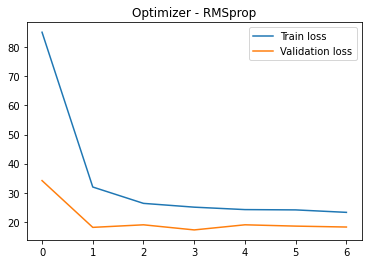

Evaluated loss:  17.726877212524414
2/2 [==============================] - 0s 4ms/step
Root Mean Squared Error (RMSE): 4.210329765128844
------------------------------
2/2 [==============================] - 0s 8ms/step - loss: 14.4196


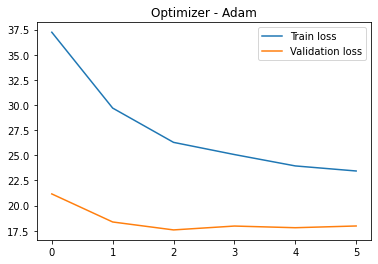

Evaluated loss:  14.419605255126953
2/2 [==============================] - 0s 5ms/step
Root Mean Squared Error (RMSE): 3.7973155184296012
------------------------------
2/2 [==============================] - 0s 7ms/step - loss: 15.1103


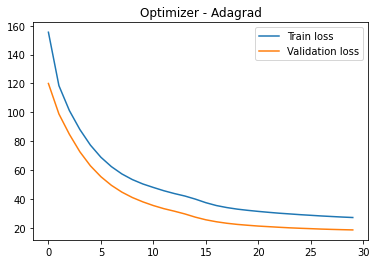

Evaluated loss:  15.110340118408203


2/2 [==============================] - 0s 9ms/step
Root Mean Squared Error (RMSE): 3.8872021444933442
------------------------------
2/2 [==============================] - 0s 5ms/step - loss: 14.6393


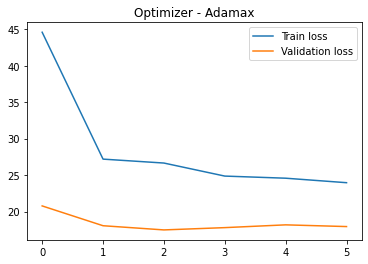

Evaluated loss:  14.639270782470703


2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 3.8261300669010208
------------------------------


In [ ]:
models_results = []
model_results = []
for optimizer in optimizers:
      experiment(data_X[0], train_Y, test_Y, optimizer)
models_results.append(model_results)

**MinMaxScaler**

2/2 [==============================] - 0s 5ms/step - loss: 12.3106


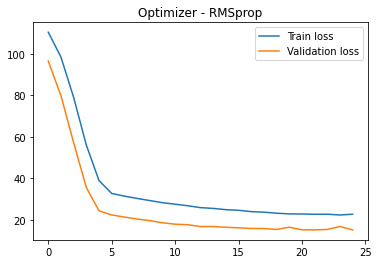

Evaluated loss:  12.310585021972656
2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 3.5086442861738445
------------------------------
2/2 [==============================] - 0s 7ms/step - loss: 12.7638


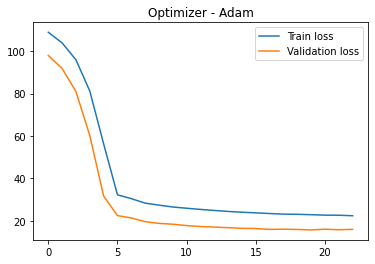

Evaluated loss:  12.763838768005371
2/2 [==============================] - 0s 6ms/step
Root Mean Squared Error (RMSE): 3.5726515583885554
------------------------------
2/2 [==============================] - 0s 4ms/step - loss: 66.9044


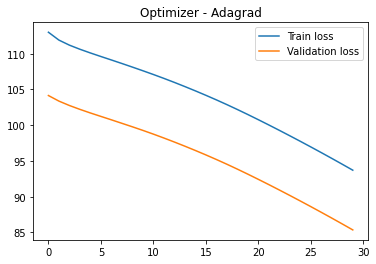

Evaluated loss:  66.90435791015625
2/2 [==============================] - 0s 6ms/step
Root Mean Squared Error (RMSE): 8.179508591194898
------------------------------
2/2 [==============================] - 0s 8ms/step - loss: 13.0088


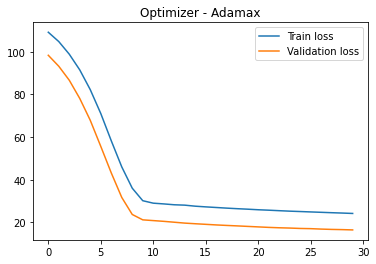

Evaluated loss:  13.008838653564453
2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 3.606776756105185
------------------------------


In [ ]:
model_results = []
for optimizer in optimizers:
      experiment(data_X[1], train_Y, test_Y, optimizer)
models_results.append(model_results)

**MaxAbsScaler**

2/2 [==============================] - 0s 7ms/step - loss: 13.3245


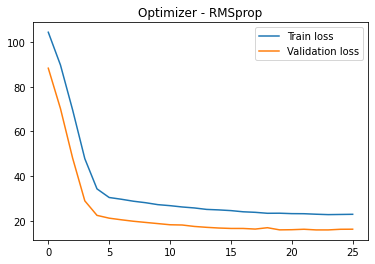

Evaluated loss:  13.324485778808594
2/2 [==============================] - 0s 5ms/step
Root Mean Squared Error (RMSE): 3.6502719023080745
------------------------------
2/2 [==============================] - 0s 6ms/step - loss: 13.3880


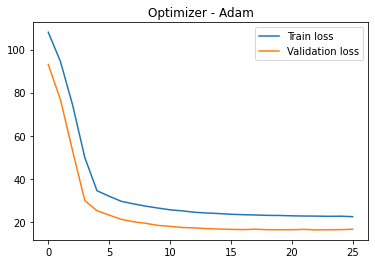

Evaluated loss:  13.388005256652832
2/2 [==============================] - 0s 6ms/step
Root Mean Squared Error (RMSE): 3.658962404260684
------------------------------
2/2 [==============================] - 0s 6ms/step - loss: 53.3990


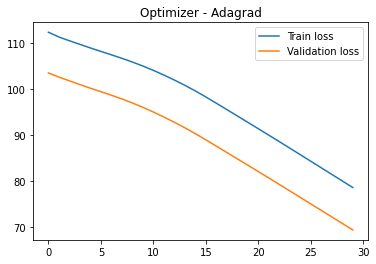

Evaluated loss:  53.39899444580078
2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 7.3074616437017275
------------------------------
2/2 [==============================] - 0s 6ms/step - loss: 13.9190


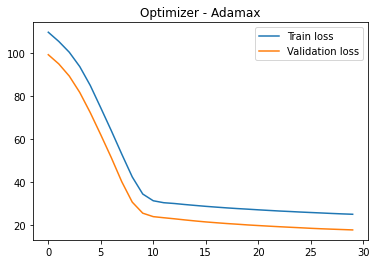

Evaluated loss:  13.918965339660645
2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 3.7308127572497822
------------------------------


In [ ]:
model_results = []
for optimizer in optimizers:
      experiment(data_X[2], train_Y, test_Y, optimizer)
models_results.append(model_results)

In [ ]:
model_results_df = pd.DataFrame(data=np.array(models_results), columns=optimizers, index=['No scaler', 'MinMaxScaler', 'MaxAbsScaler'])

In [ ]:
model_results_df

,RMSprop,Adam,Adagrad,Adamax
No scaler,4.210330,3.797316,3.887202,3.826130
MinMaxScaler,3.508644,3.572652,8.179509,3.606777
MaxAbsScaler,3.650272,3.658962,7.307462,3.730813


### Train model experiment1

**No scaler**

In [ ]:
models_results = []

2/2 [==============================] - 0s 6ms/step - loss: 14.7337


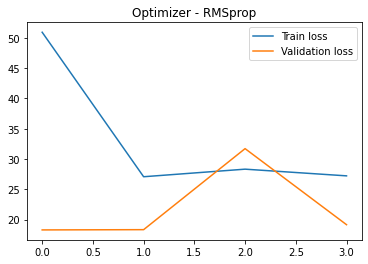

Evaluated loss:  14.733692169189453
2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 3.8384492343962586
------------------------------
2/2 [==============================] - 0s 7ms/step - loss: 15.8742


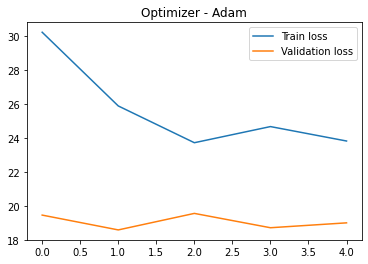

Evaluated loss:  15.874163627624512
2/2 [==============================] - 0s 6ms/step
Root Mean Squared Error (RMSE): 3.98423955416605
------------------------------
2/2 [==============================] - 0s 6ms/step - loss: 17.1428


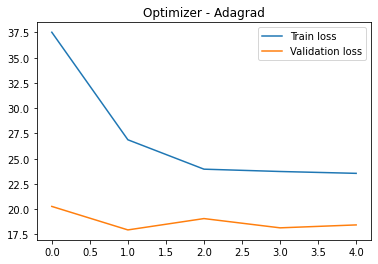

Evaluated loss:  17.14278221130371
2/2 [==============================] - 0s 5ms/step
Root Mean Squared Error (RMSE): 4.140384153374329
------------------------------
2/2 [==============================] - 0s 8ms/step - loss: 15.9612


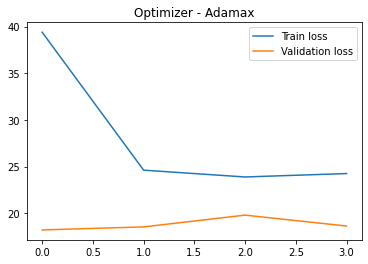

Evaluated loss:  15.961201667785645
2/2 [==============================] - 0s 9ms/step
Root Mean Squared Error (RMSE): 3.9951472843317295
------------------------------


In [ ]:
model_results = []
for optimizer in optimizers:
      experiment1(data_X[0], train_Y, test_Y, optimizer)
models_results.append(model_results)

**MinMaxScaler**

2/2 [==============================] - 0s 5ms/step - loss: 13.7790


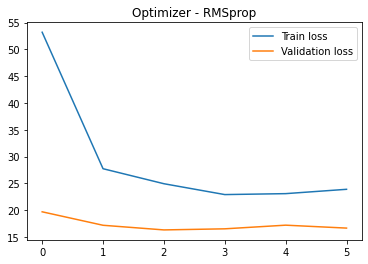

Evaluated loss:  13.778960227966309
2/2 [==============================] - 0s 6ms/step
Root Mean Squared Error (RMSE): 3.712002240123605
------------------------------
2/2 [==============================] - 0s 8ms/step - loss: 12.3791


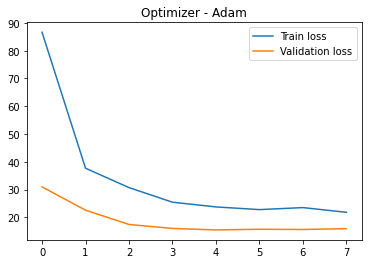

Evaluated loss:  12.379094123840332
2/2 [==============================] - 0s 5ms/step
Root Mean Squared Error (RMSE): 3.5183935436761447
------------------------------
2/2 [==============================] - 0s 8ms/step - loss: 12.0235


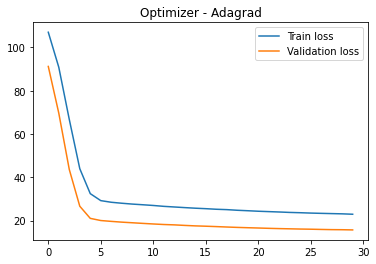

Evaluated loss:  12.023540496826172
2/2 [==============================] - 0s 5ms/step
Root Mean Squared Error (RMSE): 3.467497524091259
------------------------------
2/2 [==============================] - 0s 5ms/step - loss: 12.1395


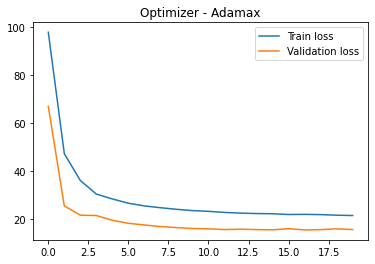

Evaluated loss:  12.13949203491211
2/2 [==============================] - 0s 5ms/step
Root Mean Squared Error (RMSE): 3.4841774545979733
------------------------------


In [ ]:
model_results = []
for optimizer in optimizers:
      experiment1(data_X[1], train_Y, test_Y, optimizer)
models_results.append(model_results)

**MaxAbsScaler**

2/2 [==============================] - 0s 7ms/step - loss: 11.2183


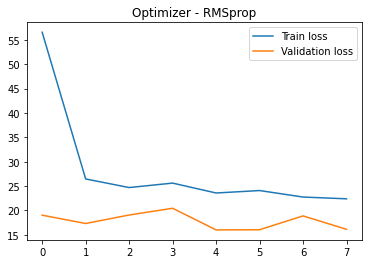

Evaluated loss:  11.218250274658203
2/2 [==============================] - 0s 9ms/step
Root Mean Squared Error (RMSE): 3.349365548920089
------------------------------
2/2 [==============================] - 0s 5ms/step - loss: 13.4707


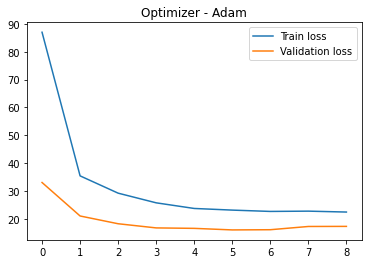

Evaluated loss:  13.470708847045898
2/2 [==============================] - 0s 6ms/step
Root Mean Squared Error (RMSE): 3.6702464855367514
------------------------------
2/2 [==============================] - 0s 7ms/step - loss: 12.5252


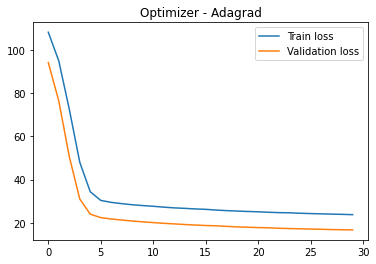

Evaluated loss:  12.525227546691895
2/2 [==============================] - 0s 8ms/step
Root Mean Squared Error (RMSE): 3.539099834277779
------------------------------
2/2 [==============================] - 0s 5ms/step - loss: 12.5161


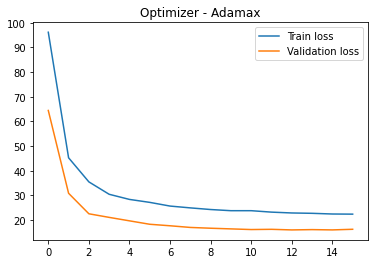

Evaluated loss:  12.516088485717773
2/2 [==============================] - 0s 8ms/step
Root Mean Squared Error (RMSE): 3.5378083096957607
------------------------------


In [ ]:
model_results = []
for optimizer in optimizers:
      experiment1(data_X[2], train_Y, test_Y, optimizer)
models_results.append(model_results)

In [ ]:
model_results_df1 = pd.DataFrame(data=np.array(models_results), columns=optimizers, index=['No scaler', 'MinMaxScaler', 'MaxAbsScaler'])

In [ ]:
model_results_df1

,RMSprop,Adam,Adagrad,Adamax
No scaler,3.838449,3.984240,4.140384,3.995147
MinMaxScaler,3.712002,3.518394,3.467498,3.484177
MaxAbsScaler,3.349366,3.670246,3.539100,3.537808


### Train model experiment2

**No scaler**

In [ ]:
models_results = []

2/2 [==============================] - 0s 7ms/step - loss: 16.1409


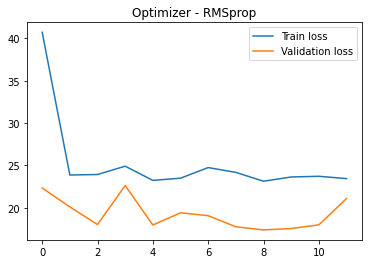

Evaluated loss:  16.140893936157227
2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 4.0175729822793915
------------------------------
2/2 [==============================] - 0s 7ms/step - loss: 17.0170


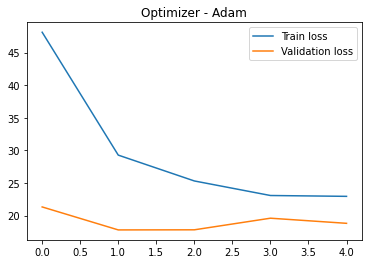

Evaluated loss:  17.017004013061523
2/2 [==============================] - 0s 4ms/step
Root Mean Squared Error (RMSE): 4.125167270756665
------------------------------
2/2 [==============================] - 0s 7ms/step - loss: 15.9710


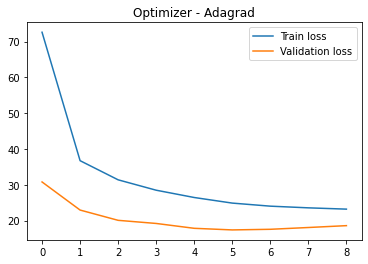

Evaluated loss:  15.97097396850586
2/2 [==============================] - 0s 6ms/step
Root Mean Squared Error (RMSE): 3.996370226622772
------------------------------
2/2 [==============================] - 0s 6ms/step - loss: 15.9301


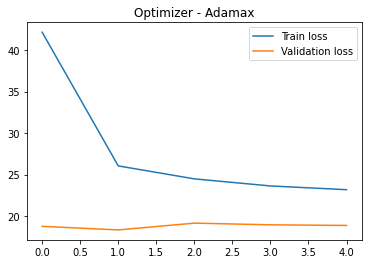

Evaluated loss:  15.930061340332031
2/2 [==============================] - 0s 6ms/step
Root Mean Squared Error (RMSE): 3.991247892099883
------------------------------


In [ ]:
model_results = []
for optimizer in optimizers:
      experiment2(data_X[0], train_Y, test_Y, optimizer)
models_results.append(model_results)

**MinMaxScaler**

2/2 [==============================] - 0s 5ms/step - loss: 13.3837


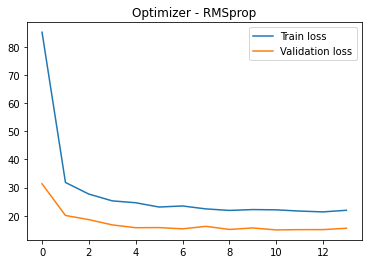

Evaluated loss:  13.383698463439941
2/2 [==============================] - 0s 5ms/step
Root Mean Squared Error (RMSE): 3.658373418762985
------------------------------
2/2 [==============================] - 0s 8ms/step - loss: 10.9546


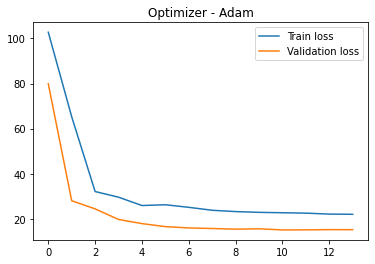

Evaluated loss:  10.95458984375
2/2 [==============================] - 0s 4ms/step
Root Mean Squared Error (RMSE): 3.309771909875004
------------------------------
2/2 [==============================] - 0s 8ms/step - loss: 14.0395


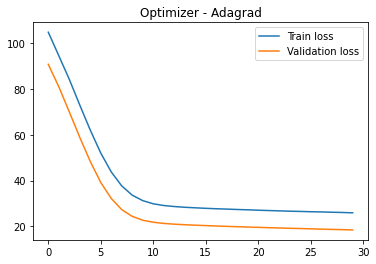

Evaluated loss:  14.039525985717773
2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 3.7469355044723835
------------------------------
2/2 [==============================] - 0s 7ms/step - loss: 11.7963


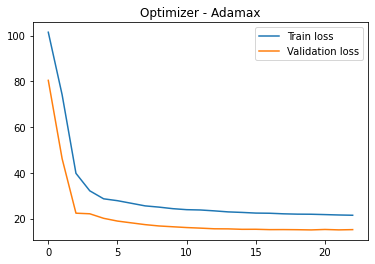

Evaluated loss:  11.796266555786133
2/2 [==============================] - 0s 8ms/step
Root Mean Squared Error (RMSE): 3.434569249851172
------------------------------


In [ ]:
model_results = []
for optimizer in optimizers:
      experiment2(data_X[1], train_Y, test_Y, optimizer)
models_results.append(model_results)

**MaxAbsScaler**

2/2 [==============================] - 0s 8ms/step - loss: 11.8751


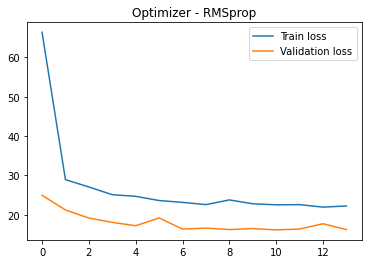

Evaluated loss:  11.875136375427246
2/2 [==============================] - 0s 5ms/step
Root Mean Squared Error (RMSE): 3.44603208351361
------------------------------
2/2 [==============================] - 0s 7ms/step - loss: 11.8143


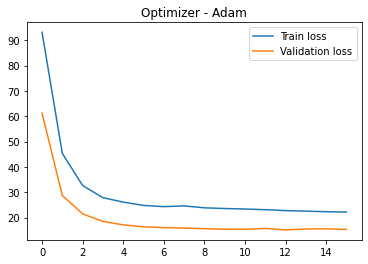

Evaluated loss:  11.81425666809082
2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 3.437187477248279
------------------------------
2/2 [==============================] - 0s 7ms/step - loss: 14.1748


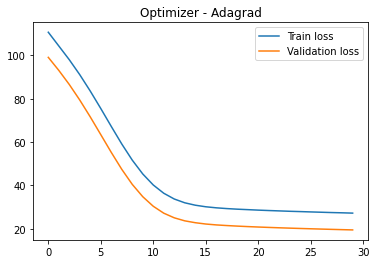

Evaluated loss:  14.174786567687988
2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 3.764941610206676
------------------------------
2/2 [==============================] - 0s 6ms/step - loss: 12.3984


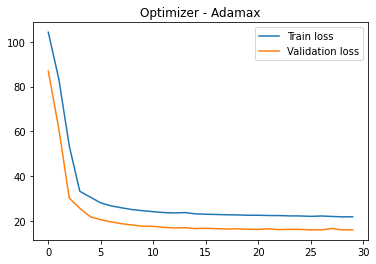

Evaluated loss:  12.398359298706055
2/2 [==============================] - 0s 8ms/step
Root Mean Squared Error (RMSE): 3.521130317000627
------------------------------


In [ ]:
model_results = []
for optimizer in optimizers:
      experiment2(data_X[2], train_Y, test_Y, optimizer)
models_results.append(model_results)

In [ ]:
model_results_df2 = pd.DataFrame(data=np.array(models_results), columns=optimizers, index=['No scaler', 'MinMaxScaler', 'MaxAbsScaler'])

In [ ]:
model_results_df2

,RMSprop,Adam,Adagrad,Adamax
No scaler,4.017573,4.125167,3.996370,3.991248
MinMaxScaler,3.658373,3.309772,3.746936,3.434569
MaxAbsScaler,3.446032,3.437187,3.764942,3.521130


### Results


In [ ]:
model_results_df

,RMSprop,Adam,Adagrad,Adamax
No scaler,4.210330,3.797316,3.887202,3.826130
MinMaxScaler,3.508644,3.572652,8.179509,3.606777
MaxAbsScaler,3.650272,3.658962,7.307462,3.730813


In [ ]:
model_results_df1

,RMSprop,Adam,Adagrad,Adamax
No scaler,3.838449,3.984240,4.140384,3.995147
MinMaxScaler,3.712002,3.518394,3.467498,3.484177
MaxAbsScaler,3.349366,3.670246,3.539100,3.537808


In [ ]:
model_results_df2

,RMSprop,Adam,Adagrad,Adamax
No scaler,4.017573,4.125167,3.996370,3.991248
MinMaxScaler,3.658373,3.309772,3.746936,3.434569
MaxAbsScaler,3.446032,3.437187,3.764942,3.521130


## Task2 Classification

In [ ]:
#read in data using pandas
diabetes_data = pd.read_csv('/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab1/diabetes_data.csv')

#check data has been read in properly
diabetes_data

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes_data['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train_df_2, test_df_2 = train_test_split(diabetes_data, test_size=0.1)

#create a dataframe with all training data except the target column
train_X_2 = train_df_2.drop(columns=['diabetes'])
test_X_2 = test_df_2.drop(columns=['diabetes'])

data_X_2 = [[train_X_2, test_X_2]]
#check that the target variable has been removed
train_X_2.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
330,8,118,72,19,0,23.1,1.476,46
442,4,117,64,27,120,33.2,0.230,24
456,1,135,54,0,0,26.7,0.687,62
688,1,140,74,26,180,24.1,0.828,23
490,2,83,65,28,66,36.8,0.629,24


In [ ]:
from keras.utils import to_categorical

#one-hot encode target column
train_y_2 = to_categorical(train_df_2['diabetes'])
test_y_2 = to_categorical(test_df_2['diabetes'])

#vcheck that target column has been converted
print(train_y_2[0:5])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# create a dataframe with all training data except the target column
# df_X_2 = diabetes_data.drop(columns=['diabetes'])

# df_X_2.head()

In [ ]:
# create a dataframe with target column
# df_Y_21 = diabetes_data['diabetes']

# df_Y_21.value_counts()

In [ ]:
# from keras.utils import to_categorical

# # create a dataframe with target column
# df_Y_2 = to_categorical(df_Y_21)

In [ ]:
# train_X_2, test_X_2, train_Y_2, test_Y_2 = train_test_split(df_X_2, df_Y_2, test_size=0.1)
# data_X_2 = [[train_X_2, test_X_2]]

### Creating model

In [ ]:
scaler = [MinMaxScaler(), MaxAbsScaler()]
for s in scaler:
  train_X_scaler = s.fit_transform(train_X_2)
  test_X_scaler = s.transform(test_X_2)
  data_X_2.append([train_X_scaler, test_X_scaler])

In [ ]:
optimizers = ['RMSprop', 'Adam', 'Adagrad', 'Adamax']

In [ ]:
def experiment3(data, train_y, test_y, optimizer):
    
  model = Sequential()

  model.add(Dense(250, activation='relu', input_shape=(data[0].shape[1],)))
  model.add(Dense(250, activation='relu'))
  model.add(Dense(250, activation='relu'))
  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  early_stopping_monitor = EarlyStopping(patience=3)
  
  history = model.fit(data[0], train_y, validation_split=0.2, callbacks=[early_stopping_monitor], epochs=30, verbose=0)
  result = model.evaluate(data[1], test_y)

  title = f'Optimizer - {optimizer}'
  results_visualization(history.history, title)
  print('Evaluated loss: ', result)

  test_y_predictions = model.predict(data[1])
  test_y_predictions_bin = np.argmax(test_y_predictions, axis = 1)
  test_y_true = test_df_2['diabetes'].to_numpy()
  confusion_matrix(test_y_true, test_y_predictions_bin, labels=[0, 1])
  target_names = ['class 0', 'class 1']
  print(classification_report(test_y_true, test_y_predictions_bin,
  target_names=target_names))

  print('-'*50, end='\n\n')

In [ ]:
def experiment4(data, train_y, test_y, optimizer):
    
  model = Sequential()

  model.add(Dense(100, activation='relu', input_shape=(data[0].shape[1],)))
  model.add(Dense(250, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  early_stopping_monitor = EarlyStopping(patience=3)
  
  history = model.fit(data[0], train_y, validation_split=0.2, callbacks=[early_stopping_monitor], epochs=30, verbose=0)
  result = model.evaluate(data[1], test_y)

  title = f'Optimizer - {optimizer}'
  results_visualization(history.history, title)
  print('Evaluated loss: ', result)

  test_y_predictions = model.predict(data[1])
  test_y_predictions_bin = np.argmax(test_y_predictions, axis = 1)
  test_y_true = test_df_2['diabetes'].to_numpy()
  confusion_matrix(test_y_true, test_y_predictions_bin, labels=[0, 1])
  target_names = ['class 0', 'class 1']
  print(classification_report(test_y_true, test_y_predictions_bin,
  target_names=target_names))

  print('-'*50, end='\n\n')

In [ ]:
def experiment5(data, train_y, test_y, optimizer):
    
  model = Sequential()

  model.add(Dense(100, activation='relu', input_shape=(data[0].shape[1],)))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  early_stopping_monitor = EarlyStopping(patience=3)
  
  history = model.fit(data[0], train_y, validation_split=0.2, callbacks=[early_stopping_monitor], epochs=30, verbose=0)
  result = model.evaluate(data[1], test_y)

  title = f'Optimizer - {optimizer}'
  results_visualization(history.history, title)
  print('Evaluated loss: ', result)

  test_y_predictions = model.predict(data[1])
  test_y_predictions_bin = np.argmax(test_y_predictions, axis = 1)
  test_y_true = test_df_2['diabetes'].to_numpy()
  confusion_matrix(test_y_true, test_y_predictions_bin, labels=[0, 1])
  target_names = ['class 0', 'class 1']
  print(classification_report(test_y_true, test_y_predictions_bin,
  target_names=target_names))

  print('-'*50, end='\n\n')

### Train model experiment3

**No scaler**

3/3 [==============================] - 0s 5ms/step - loss: 1.1437 - accuracy: 0.6234


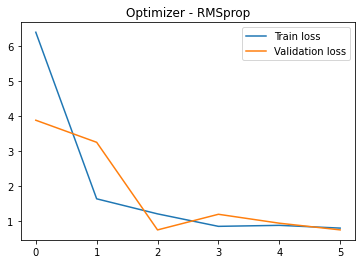

Evaluated loss:  [1.1437045335769653, 0.6233766078948975]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.65      0.90      0.76        50
     class 1       0.38      0.11      0.17        27

    accuracy                           0.62        77
   macro avg       0.51      0.51      0.46        77
weighted avg       0.55      0.62      0.55        77

--------------------------------------------------

3/3 [==============================] - 0s 5ms/step - loss: 0.9945 - accuracy: 0.5584


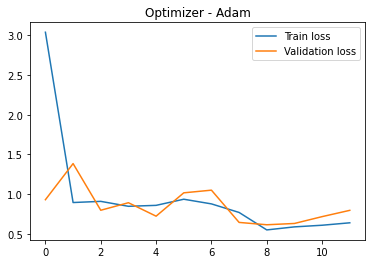

Evaluated loss:  [0.9944966435432434, 0.5584415793418884]
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     class 0       0.74      0.50      0.60        50
     class 1       0.42      0.67      0.51        27

    accuracy                           0.56        77
   macro avg       0.58      0.58      0.55        77
weighted avg       0.62      0.56      0.57        77

--------------------------------------------------

3/3 [==============================] - 0s 5ms/step - loss: 0.9768 - accuracy: 0.5325


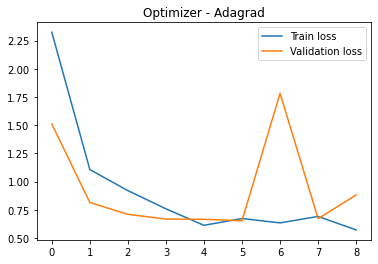

Evaluated loss:  [0.9767661094665527, 0.5324675440788269]
3/3 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

     class 0       0.82      0.36      0.50        50
     class 1       0.42      0.85      0.56        27

    accuracy                           0.53        77
   macro avg       0.62      0.61      0.53        77
weighted avg       0.68      0.53      0.52        77

--------------------------------------------------

3/3 [==============================] - 0s 5ms/step - loss: 0.8039 - accuracy: 0.7013


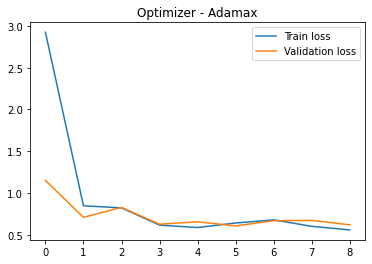

Evaluated loss:  [0.8039329051971436, 0.701298713684082]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.75      0.82      0.78        50
     class 1       0.59      0.48      0.53        27

    accuracy                           0.70        77
   macro avg       0.67      0.65      0.66        77
weighted avg       0.69      0.70      0.69        77

--------------------------------------------------



In [ ]:
for optimizer in optimizers:
      experiment3(data_X_2[0], train_y_2, test_y_2, optimizer)

**MinMaxScaler**

3/3 [==============================] - 0s 5ms/step - loss: 0.7022 - accuracy: 0.6104


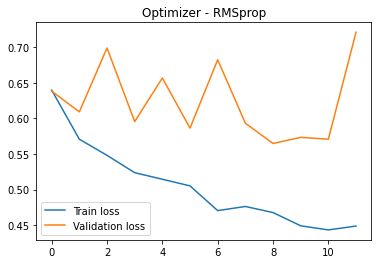

Evaluated loss:  [0.7021767497062683, 0.6103895902633667]
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     class 0       0.88      0.46      0.61        50
     class 1       0.47      0.89      0.62        27

    accuracy                           0.61        77
   macro avg       0.68      0.67      0.61        77
weighted avg       0.74      0.61      0.61        77

--------------------------------------------------

3/3 [==============================] - 0s 5ms/step - loss: 0.5518 - accuracy: 0.7662


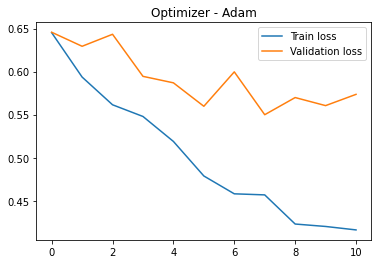

Evaluated loss:  [0.5517849326133728, 0.7662337422370911]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.83      0.80      0.82        50
     class 1       0.66      0.70      0.68        27

    accuracy                           0.77        77
   macro avg       0.74      0.75      0.75        77
weighted avg       0.77      0.77      0.77        77

--------------------------------------------------

3/3 [==============================] - 0s 9ms/step - loss: 0.6521 - accuracy: 0.6494


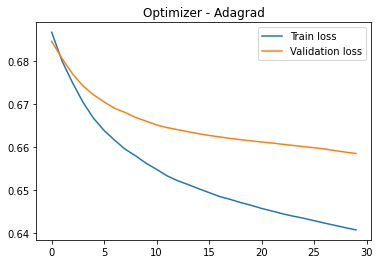

Evaluated loss:  [0.6521421074867249, 0.649350643157959]
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     class 0       0.65      1.00      0.79        50
     class 1       0.00      0.00      0.00        27

    accuracy                           0.65        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.42      0.65      0.51        77

--------------------------------------------------



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 5ms/step - loss: 0.5514 - accuracy: 0.7532


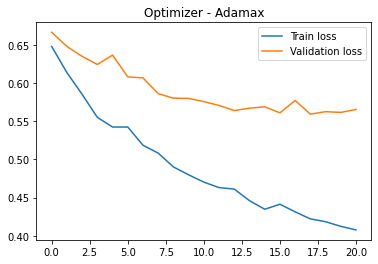

Evaluated loss:  [0.5513637065887451, 0.7532467246055603]
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     class 0       0.79      0.84      0.82        50
     class 1       0.67      0.59      0.63        27

    accuracy                           0.75        77
   macro avg       0.73      0.72      0.72        77
weighted avg       0.75      0.75      0.75        77

--------------------------------------------------



In [ ]:
for optimizer in optimizers:
      experiment3(data_X_2[1], train_y_2, test_y_2, optimizer)

**MaxAbsScaler**

3/3 [==============================] - 0s 5ms/step - loss: 0.7594 - accuracy: 0.6883


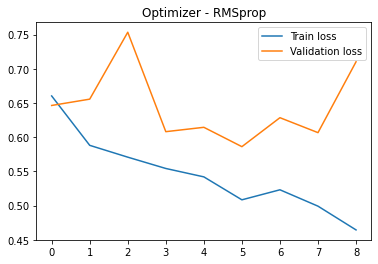

Evaluated loss:  [0.7593622803688049, 0.6883116960525513]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.68      0.98      0.80        50
     class 1       0.80      0.15      0.25        27

    accuracy                           0.69        77
   macro avg       0.74      0.56      0.53        77
weighted avg       0.72      0.69      0.61        77

--------------------------------------------------

3/3 [==============================] - 0s 6ms/step - loss: 0.5820 - accuracy: 0.7273


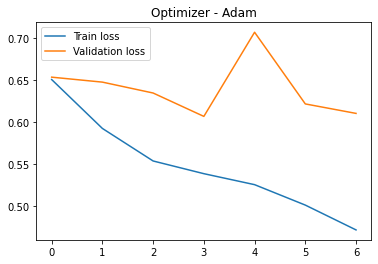

Evaluated loss:  [0.5819681882858276, 0.7272727489471436]
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     class 0       0.80      0.78      0.79        50
     class 1       0.61      0.63      0.62        27

    accuracy                           0.73        77
   macro avg       0.70      0.70      0.70        77
weighted avg       0.73      0.73      0.73        77

--------------------------------------------------

3/3 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6494


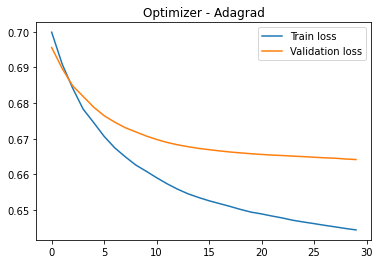

Evaluated loss:  [0.6506380438804626, 0.649350643157959]
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     class 0       0.65      1.00      0.79        50
     class 1       0.00      0.00      0.00        27

    accuracy                           0.65        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.42      0.65      0.51        77

--------------------------------------------------



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 5ms/step - loss: 0.6193 - accuracy: 0.7403


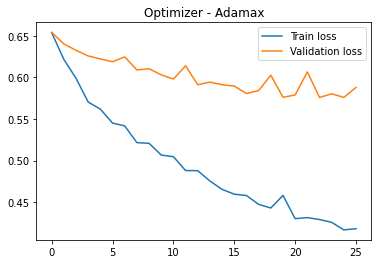

Evaluated loss:  [0.6193329095840454, 0.7402597665786743]
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     class 0       0.75      0.90      0.82        50
     class 1       0.71      0.44      0.55        27

    accuracy                           0.74        77
   macro avg       0.73      0.67      0.68        77
weighted avg       0.73      0.74      0.72        77

--------------------------------------------------



In [ ]:
for optimizer in optimizers:
      experiment3(data_X_2[2], train_y_2, test_y_2, optimizer)

### Train model experiment4

**No scaler**

3/3 [==============================] - 0s 3ms/step - loss: 1.3030 - accuracy: 0.4416


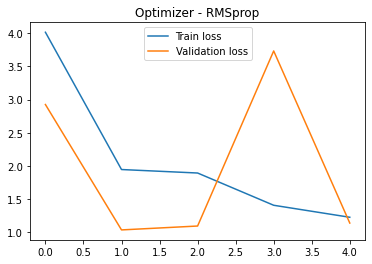

Evaluated loss:  [1.3030437231063843, 0.44155845046043396]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.68      0.26      0.38        50
     class 1       0.36      0.78      0.49        27

    accuracy                           0.44        77
   macro avg       0.52      0.52      0.44        77
weighted avg       0.57      0.44      0.42        77

--------------------------------------------------

3/3 [==============================] - 0s 4ms/step - loss: 1.0042 - accuracy: 0.6623


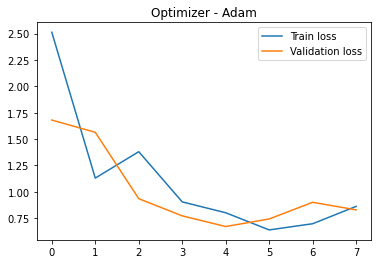

Evaluated loss:  [1.0042445659637451, 0.6623376607894897]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.73      0.76      0.75        50
     class 1       0.52      0.48      0.50        27

    accuracy                           0.66        77
   macro avg       0.63      0.62      0.62        77
weighted avg       0.66      0.66      0.66        77

--------------------------------------------------

3/3 [==============================] - 0s 5ms/step - loss: 1.0514 - accuracy: 0.6623


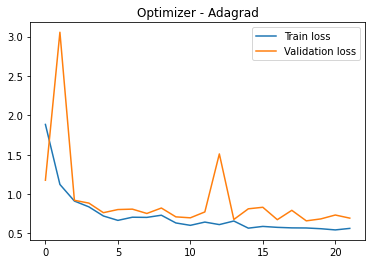

Evaluated loss:  [1.0513896942138672, 0.6623376607894897]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.70      0.84      0.76        50
     class 1       0.53      0.33      0.41        27

    accuracy                           0.66        77
   macro avg       0.61      0.59      0.59        77
weighted avg       0.64      0.66      0.64        77

--------------------------------------------------

3/3 [==============================] - 0s 5ms/step - loss: 0.9614 - accuracy: 0.6104


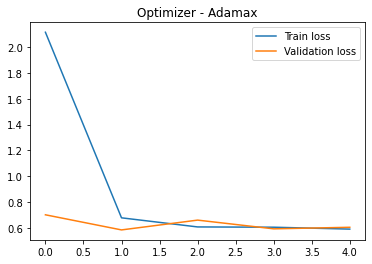

Evaluated loss:  [0.9613716006278992, 0.6103895902633667]
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     class 0       0.67      0.80      0.73        50
     class 1       0.41      0.26      0.32        27

    accuracy                           0.61        77
   macro avg       0.54      0.53      0.52        77
weighted avg       0.58      0.61      0.58        77

--------------------------------------------------



In [ ]:
for optimizer in optimizers:
      experiment4(data_X_2[0], train_y_2, test_y_2, optimizer)

**MinMaxScaler**

3/3 [==============================] - 0s 5ms/step - loss: 0.5575 - accuracy: 0.7273


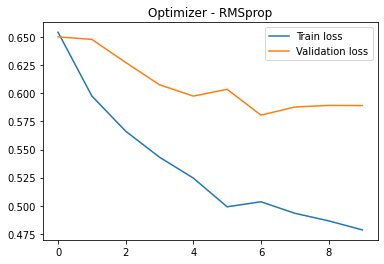

Evaluated loss:  [0.5574590563774109, 0.7272727489471436]
3/3 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

     class 0       0.76      0.84      0.80        50
     class 1       0.64      0.52      0.57        27

    accuracy                           0.73        77
   macro avg       0.70      0.68      0.69        77
weighted avg       0.72      0.73      0.72        77

--------------------------------------------------

3/3 [==============================] - 0s 5ms/step - loss: 0.5492 - accuracy: 0.7532


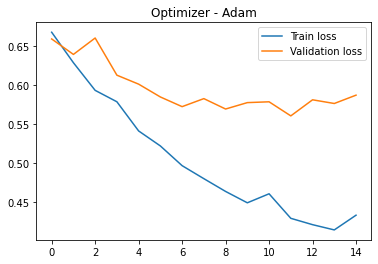

Evaluated loss:  [0.5491817593574524, 0.7532467246055603]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.80      0.82      0.81        50
     class 1       0.65      0.63      0.64        27

    accuracy                           0.75        77
   macro avg       0.73      0.72      0.73        77
weighted avg       0.75      0.75      0.75        77

--------------------------------------------------

3/3 [==============================] - 0s 6ms/step - loss: 0.6491 - accuracy: 0.6494


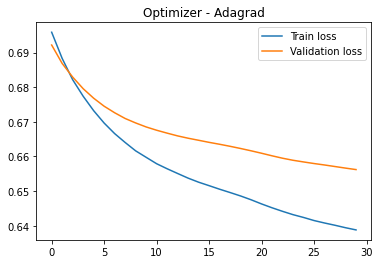

Evaluated loss:  [0.6490526795387268, 0.649350643157959]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.65      1.00      0.79        50
     class 1       0.00      0.00      0.00        27

    accuracy                           0.65        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.42      0.65      0.51        77

--------------------------------------------------



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 4ms/step - loss: 0.5528 - accuracy: 0.7532


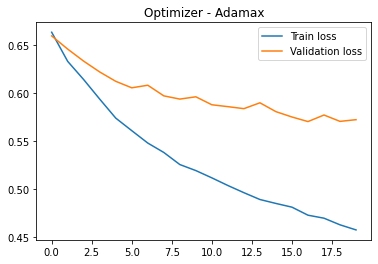

Evaluated loss:  [0.5528442859649658, 0.7532467246055603]
3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     class 0       0.77      0.88      0.82        50
     class 1       0.70      0.52      0.60        27

    accuracy                           0.75        77
   macro avg       0.74      0.70      0.71        77
weighted avg       0.75      0.75      0.74        77

--------------------------------------------------



In [ ]:
for optimizer in optimizers:
      experiment4(data_X_2[1], train_y_2, test_y_2, optimizer)

**MaxAbsScaler**

3/3 [==============================] - 0s 5ms/step - loss: 0.6982 - accuracy: 0.6883


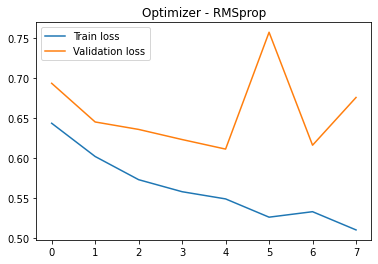

Evaluated loss:  [0.6982088685035706, 0.6883116960525513]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.69      0.96      0.80        50
     class 1       0.71      0.19      0.29        27

    accuracy                           0.69        77
   macro avg       0.70      0.57      0.55        77
weighted avg       0.70      0.69      0.62        77

--------------------------------------------------

3/3 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7532


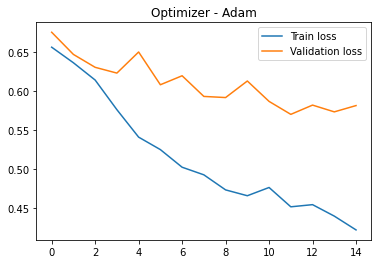

Evaluated loss:  [0.5644913911819458, 0.7532467246055603]
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     class 0       0.79      0.84      0.82        50
     class 1       0.67      0.59      0.63        27

    accuracy                           0.75        77
   macro avg       0.73      0.72      0.72        77
weighted avg       0.75      0.75      0.75        77

--------------------------------------------------

3/3 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6494


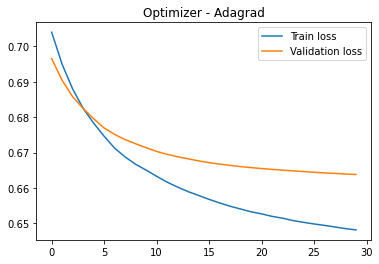

Evaluated loss:  [0.6504036784172058, 0.649350643157959]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.65      1.00      0.79        50
     class 1       0.00      0.00      0.00        27

    accuracy                           0.65        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.42      0.65      0.51        77

--------------------------------------------------



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 5ms/step - loss: 0.6049 - accuracy: 0.7273


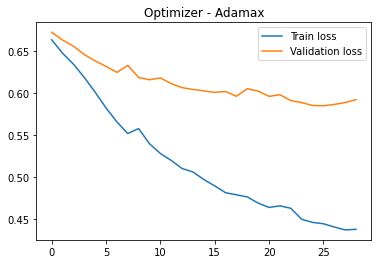

Evaluated loss:  [0.6048996448516846, 0.7272727489471436]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.74      0.90      0.81        50
     class 1       0.69      0.41      0.51        27

    accuracy                           0.73        77
   macro avg       0.71      0.65      0.66        77
weighted avg       0.72      0.73      0.71        77

--------------------------------------------------



In [ ]:
for optimizer in optimizers:
      experiment4(data_X_2[2], train_y_2, test_y_2, optimizer)

### Train model experiment5

**No scaler**

3/3 [==============================] - 0s 4ms/step - loss: 1.8065 - accuracy: 0.6104


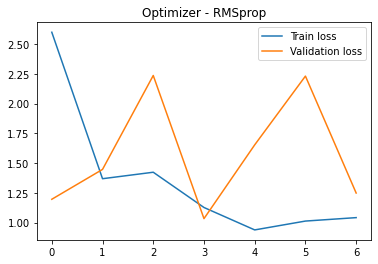

Evaluated loss:  [1.8065365552902222, 0.6103895902633667]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.64      0.94      0.76        50
     class 1       0.00      0.00      0.00        27

    accuracy                           0.61        77
   macro avg       0.32      0.47      0.38        77
weighted avg       0.41      0.61      0.49        77

--------------------------------------------------

3/3 [==============================] - 0s 4ms/step - loss: 0.8327 - accuracy: 0.6753


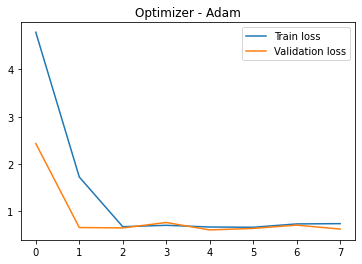

Evaluated loss:  [0.832715630531311, 0.6753246784210205]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.77      0.72      0.74        50
     class 1       0.53      0.59      0.56        27

    accuracy                           0.68        77
   macro avg       0.65      0.66      0.65        77
weighted avg       0.68      0.68      0.68        77

--------------------------------------------------

3/3 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.6623


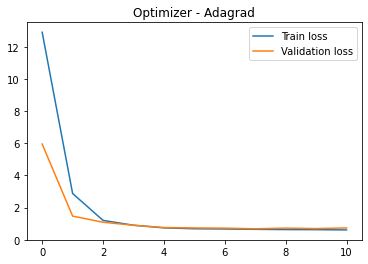

Evaluated loss:  [0.6927916407585144, 0.6623376607894897]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.79      0.66      0.72        50
     class 1       0.51      0.67      0.58        27

    accuracy                           0.66        77
   macro avg       0.65      0.66      0.65        77
weighted avg       0.69      0.66      0.67        77

--------------------------------------------------

3/3 [==============================] - 0s 4ms/step - loss: 0.7350 - accuracy: 0.5844


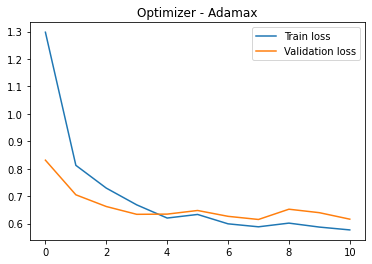

Evaluated loss:  [0.7350476980209351, 0.5844155550003052]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.65      0.78      0.71        50
     class 1       0.35      0.22      0.27        27

    accuracy                           0.58        77
   macro avg       0.50      0.50      0.49        77
weighted avg       0.55      0.58      0.56        77

--------------------------------------------------



In [ ]:
for optimizer in optimizers:
      experiment5(data_X_2[0], train_y_2, test_y_2, optimizer)

**MinMaxScaler**

3/3 [==============================] - 0s 4ms/step - loss: 0.5374 - accuracy: 0.7532


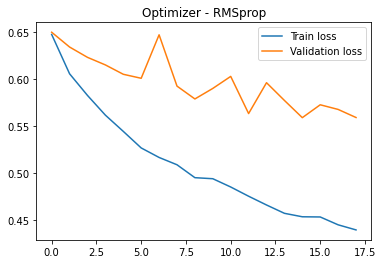

Evaluated loss:  [0.5373932123184204, 0.7532467246055603]
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     class 0       0.76      0.90      0.83        50
     class 1       0.72      0.48      0.58        27

    accuracy                           0.75        77
   macro avg       0.74      0.69      0.70        77
weighted avg       0.75      0.75      0.74        77

--------------------------------------------------

3/3 [==============================] - 0s 5ms/step - loss: 0.6476 - accuracy: 0.6883


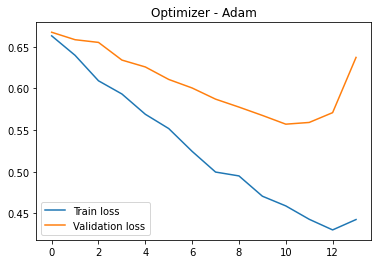

Evaluated loss:  [0.6476408839225769, 0.6883116960525513]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.69      0.96      0.80        50
     class 1       0.71      0.19      0.29        27

    accuracy                           0.69        77
   macro avg       0.70      0.57      0.55        77
weighted avg       0.70      0.69      0.62        77

--------------------------------------------------

3/3 [==============================] - 0s 4ms/step - loss: 0.6444 - accuracy: 0.6494


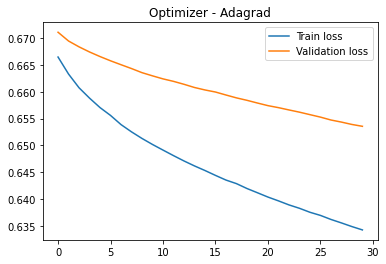

Evaluated loss:  [0.6443976163864136, 0.649350643157959]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.65      1.00      0.79        50
     class 1       0.00      0.00      0.00        27

    accuracy                           0.65        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.42      0.65      0.51        77

--------------------------------------------------



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 5ms/step - loss: 0.5297 - accuracy: 0.7662


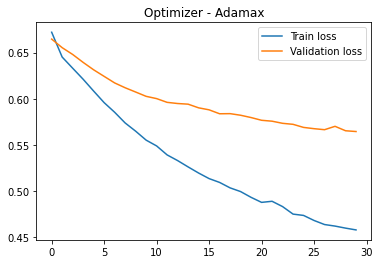

Evaluated loss:  [0.5297402143478394, 0.7662337422370911]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.78      0.90      0.83        50
     class 1       0.74      0.52      0.61        27

    accuracy                           0.77        77
   macro avg       0.76      0.71      0.72        77
weighted avg       0.76      0.77      0.75        77

--------------------------------------------------



In [ ]:
for optimizer in optimizers:
      experiment5(data_X_2[1], train_y_2, test_y_2, optimizer)

**MaxAbsScaler**

3/3 [==============================] - 0s 4ms/step - loss: 0.5620 - accuracy: 0.7662


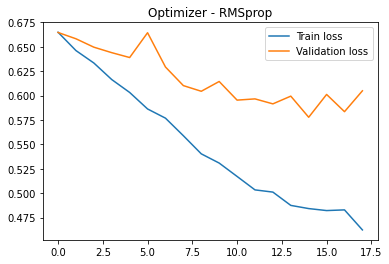

Evaluated loss:  [0.5619557499885559, 0.7662337422370911]
3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     class 0       0.81      0.84      0.82        50
     class 1       0.68      0.63      0.65        27

    accuracy                           0.77        77
   macro avg       0.74      0.73      0.74        77
weighted avg       0.76      0.77      0.76        77

--------------------------------------------------

3/3 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7013


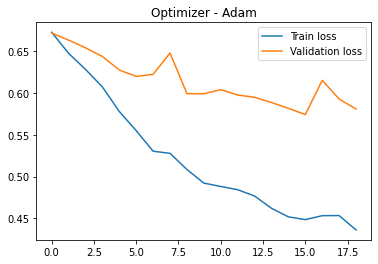

Evaluated loss:  [0.5714873671531677, 0.701298713684082]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.75      0.80      0.78        50
     class 1       0.58      0.52      0.55        27

    accuracy                           0.70        77
   macro avg       0.67      0.66      0.66        77
weighted avg       0.69      0.70      0.70        77

--------------------------------------------------

3/3 [==============================] - 0s 5ms/step - loss: 0.6603 - accuracy: 0.6494


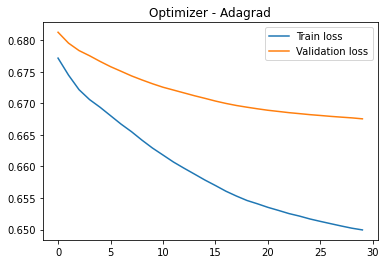

Evaluated loss:  [0.6602743864059448, 0.649350643157959]
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     class 0       0.65      1.00      0.79        50
     class 1       0.00      0.00      0.00        27

    accuracy                           0.65        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.42      0.65      0.51        77

--------------------------------------------------



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 5ms/step - loss: 0.5915 - accuracy: 0.7532


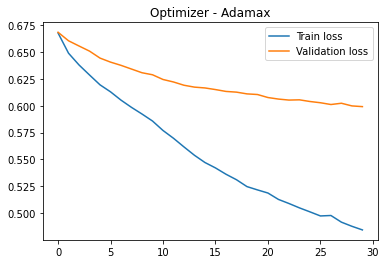

Evaluated loss:  [0.5915456414222717, 0.7532467246055603]
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     class 0       0.75      0.92      0.83        50
     class 1       0.75      0.44      0.56        27

    accuracy                           0.75        77
   macro avg       0.75      0.68      0.69        77
weighted avg       0.75      0.75      0.73        77

--------------------------------------------------



In [ ]:
for optimizer in optimizers:
      experiment5(data_X_2[2], train_y_2, test_y_2, optimizer)

## Task3

In [ ]:
iris_data = pd.read_csv("/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab1/reports/Khoroshchuk-12/iris-id.csv")
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [ ]:
iris_data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

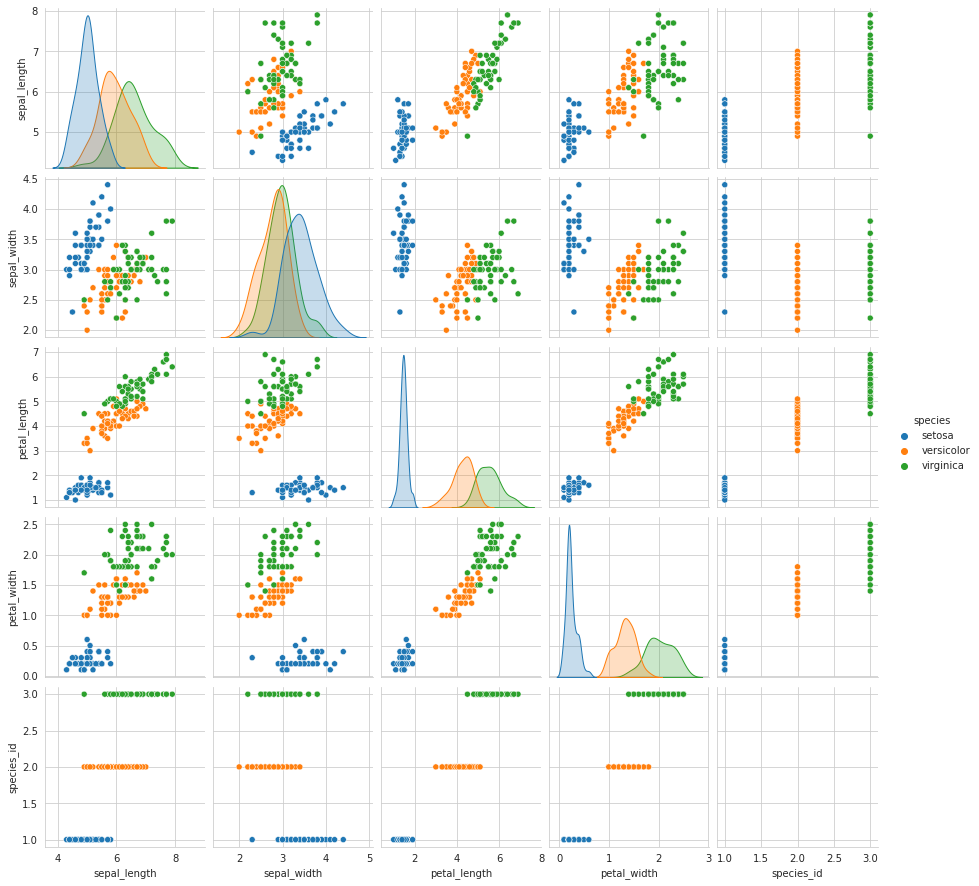

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(iris_data, hue="species")
plt.show()

In [ ]:
X = iris_data.drop(['species','species_id'], axis = 1)
y = iris_data.species_id

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y = le.transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
train_X_3, test_X_3, train_y, test_y = train_test_split(X, y, test_size=0.1)
data_X_3 = [[train_X_3, test_X_3]]

**Standart Scaler - scales data such that the distribution centered around 0, with a standard deviation of 1.**

In [ ]:
scaler = StandardScaler()
train_X_scaler = scaler.fit_transform(train_X_3)
test_X_scaler = scaler.transform(test_X_3)
data_X_3.append([train_X_scaler, test_X_scaler])

In [ ]:
from keras.utils import to_categorical

#one-hot encode target column
train_y_3 = to_categorical(train_y, num_classes=3)
test_y_3 = to_categorical(test_y, num_classes=3)

In [ ]:
optimizers = ['SGD', 'RMSprop', 'Adam', 'Adagrad']

In [ ]:
def results_visualization(result, title):
  plt.title(title)
  plt.plot(result['loss'], label='Train loss')
  plt.plot(result['val_loss'], label='Validation loss')
  plt.legend()
  plt.show()

In [ ]:
def experiment_iris(data, train_y, test_y, optimizer):
    
  model = Sequential()

  model.add(Dense(250, activation='relu', input_shape=(data[0].shape[1],)))
  model.add(Dense(250, activation='relu'))
  #model.add(Dense(150, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  early_stopping_monitor = EarlyStopping(patience=3)
  
  history = model.fit(data[0], train_y, validation_split=0.2, callbacks=[early_stopping_monitor], epochs=30, verbose=0)
  title = f'Optimizer - {optimizer}'
  result = model.evaluate(data[1], test_y)
  results_visualization(history.history, title)



  print('-'*50, end='\n\n')

**No scaler**

1/1 [==============================] - 0s 27ms/step - loss: 0.4516 - accuracy: 1.0000


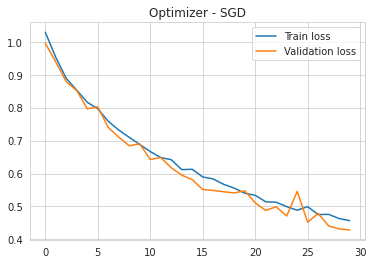

Evaluated loss:  [0.45164698362350464, 1.0]
--------------------------------------------------

1/1 [==============================] - 0s 22ms/step - loss: 0.0912 - accuracy: 1.0000


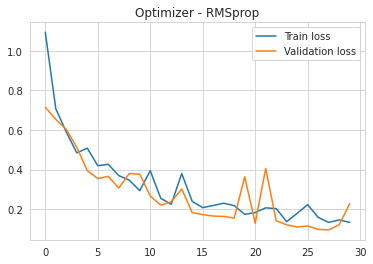

Evaluated loss:  [0.09122777730226517, 1.0]
--------------------------------------------------

1/1 [==============================] - 0s 18ms/step - loss: 0.0689 - accuracy: 1.0000


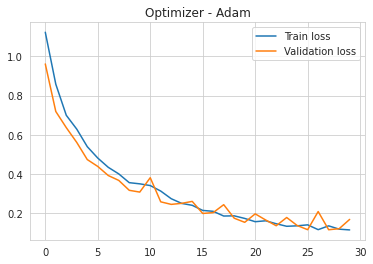

Evaluated loss:  [0.06889306753873825, 1.0]
--------------------------------------------------

1/1 [==============================] - 0s 19ms/step - loss: 0.7987 - accuracy: 0.6000


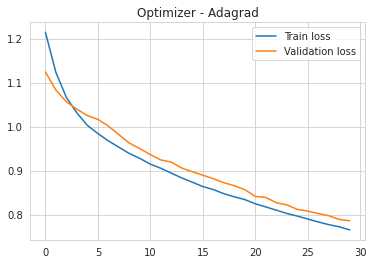

Evaluated loss:  [0.7986910343170166, 0.6000000238418579]
--------------------------------------------------



In [ ]:
for optimizer in optimizers:
      experiment_iris(data_X_3[0], train_y_3, test_y_3, optimizer)

**StandartScaler**

1/1 [==============================] - 0s 17ms/step - loss: 0.5909 - accuracy: 0.7333


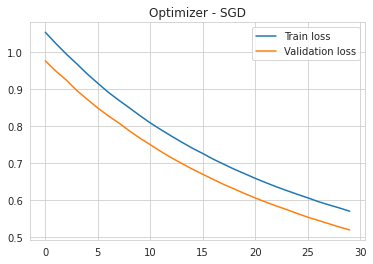

--------------------------------------------------

1/1 [==============================] - 0s 20ms/step - loss: 0.0197 - accuracy: 1.0000


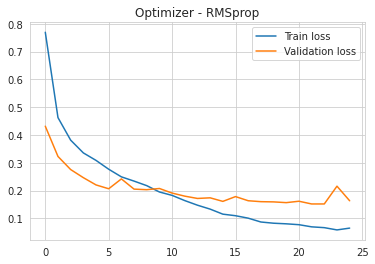

--------------------------------------------------

1/1 [==============================] - 0s 18ms/step - loss: 0.0641 - accuracy: 1.0000


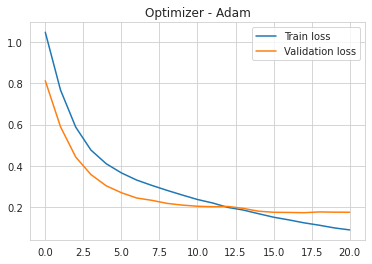

--------------------------------------------------

1/1 [==============================] - 0s 22ms/step - loss: 0.8489 - accuracy: 0.7333


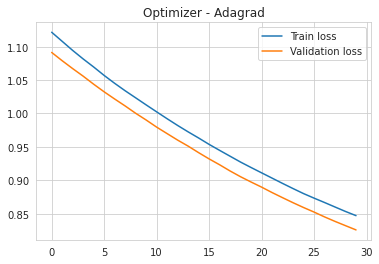

--------------------------------------------------



In [ ]:
for optimizer in optimizers:
      experiment_iris(data_X_3[1], train_y_3, test_y_3, optimizer)